In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.optimize import least_squares
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy import integrate
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df =  pd.read_csv('data_semi.csv', index_col = 0)
data_df

,Tenor,Rate,float,OIS_Discount,lbs_rate,lbs_Discount,forward_libor
0,0.5,0.00250,0.002497,0.998752,0.0250,0.987654,0.025000
1,1.0,0.00300,0.002996,0.997009,0.0280,0.972577,0.031005
2,1.5,NaN,0.003495,0.995268,NaN,0.957378,0.031751
3,2.0,0.00325,0.003495,0.993531,0.0300,0.942179,0.032263
4,2.5,NaN,0.003545,0.991771,NaN,0.926330,0.034218
5,3.0,0.00335,0.003545,0.990015,0.0315,0.910482,0.034814
6,3.5,NaN,0.003946,0.988064,NaN,0.894731,0.035207
7,4.0,0.00350,0.003946,0.986117,0.0325,0.878981,0.035838
8,4.5,NaN,0.003996,0.984148,NaN,0.863985,0.034713
9,5.0,0.00360,0.003996,0.982184,0.0330,0.848989,0.035326


In [3]:
data_swap = pd.read_csv('forward_swap_6m.csv', index_col = 0)
data_swap

,Expiry,Tenor,forward_swap
0,0.5,1,0.028000
1,0.5,2,0.030000
2,0.5,3,0.031500
3,0.5,5,0.033000
4,0.5,10,0.037000
5,1.0,1,0.032007
6,1.0,2,0.033259
7,1.0,3,0.034011
8,1.0,5,0.035255
9,1.0,10,0.038424


In [4]:
def interpolate_func(x_list,y_list,x_new):
    y_interp = interpolate.interp1d(x_list, y_list)
    value = y_interp(x_new)
    return float(value)

In [5]:
def Black76Pay(F, K, T, sigma):
    d1 = (np.log(F / K) + (sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return (F * norm.cdf(d1) - K * norm.cdf(d2))

def Black76Rec(F, K, T, sigma):
    d1 = (np.log(F / K) + (sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return (K * norm.cdf(-d2) - F * norm.cdf(-d1))

In [6]:
def SABR(F, K, T, alpha, beta, rho, nu):
    X = K
    # if K is at-the-money-forward
    if abs(F - K) < 1e-12:
        numer1 = (((1 - beta)**2)/24)*alpha*alpha/(F**(2 - 2*beta))
        numer2 = 0.25*rho*beta*nu*alpha/(F**(1 - beta))
        numer3 = ((2 - 3*rho*rho)/24)*nu*nu
        VolAtm = alpha*(1 + (numer1 + numer2 + numer3)*T)/(F**(1-beta))
        sabrsigma = VolAtm
    else:
        z = (nu/alpha)*((F*X)**(0.5*(1-beta)))*np.log(F/X)
        zhi = np.log((((1 - 2*rho*z + z*z)**0.5) + z - rho)/(1 - rho))
        numer1 = (((1 - beta)**2)/24)*((alpha*alpha)/((F*X)**(1 - beta)))
        numer2 = 0.25*rho*beta*nu*alpha/((F*X)**((1 - beta)/2))
        numer3 = ((2 - 3*rho*rho)/24)*nu*nu
        numer = alpha*(1 + (numer1 + numer2 + numer3)*T)*z
        denom1 = ((1 - beta)**2/24)*(np.log(F/X))**2
        denom2 = (((1 - beta)**4)/1920)*((np.log(F/X))**4)
        denom = ((F*X)**((1 - beta)/2))*(1 + denom1 + denom2)*zhi
        sabrsigma = numer/denom

    return sabrsigma


In [7]:
def IRR(K,N,n,frequency):
    Nperiods = int((N-n)/frequency)
    IRR_list = [frequency/(1+frequency*K)**i for i in range(1,Nperiods+1)]
    IRR = sum(IRR_list)
    return IRR

def IRRp_1(K,N,n,frequency):
    Nperiods = int((N-n)/frequency)
    IRRp_1_list = [frequency**2*(-i)*(1+frequency*K)**(-i-1) for i in range(1,Nperiods+1)]
    IRRp_1 = sum(IRRp_1_list)
    return IRRp_1

def IRRp_2(K,N,n,frequency):
    Nperiods = int((N-n)/frequency)
    IRRp_2_list=[frequency**3*i*(i+1)*(1+frequency*K)**(-i-2) for i in range(1,Nperiods+1)]
    IRRp_2 = sum(IRRp_2_list)
    return IRRp_2

def HP_2(K,N,n,frequency):
    IRRp2n = IRRp_2(K,N,n,frequency)
    IRRp1n = IRRp_1(K,N,n,frequency)
    IRRn = IRR(K,N,n,frequency)
    return (-IRRp2n*K - 2*IRRp1n)/IRRn**2 + 2*K*(IRRp1n**2)/(IRRn**3)

def Payer_integrate_function(K,F,N,n,T,frequency,alpha,beta,rho,nu):
    IRRn = IRR(F,N,n,frequency)
    HPrime2n = HP_2(K,N,n,frequency)
    sigma = SABR(F, K, T, alpha, beta, rho, nu)
    return IRRn*HPrime2n*Black76Pay(F,K,T,sigma)

def Receiver_integrate_function(K,F,N,n,T,frequency,alpha,beta,rho,nu):
    IRRn = IRR(F,N,n,frequency)
    HPrime2n = HP_2(K,N,n,frequency)
    sigma = SABR(F, K, T, alpha, beta, rho, nu)
    return IRRn*HPrime2n*Black76Rec(F,K,T,sigma)

def getCMSRate(F,N,n,T,frequency,alpha, beta, rho, nu):    
    Receiver = integrate.quad(lambda K :Receiver_integrate_function(K,F,N,n,T,frequency,alpha,beta,rho,nu),0,F)[0]
    Payer = integrate.quad(lambda K :Payer_integrate_function(K,F,N,n,T,frequency,alpha,beta,rho,nu),F,0.99)[0]
    return F + Receiver + Payer

def payWeights(F,N,n,T,frequency, upper, DF):
    weights = integrate.quad(lambda K : HP_2(K,N,n,frequency) , F , upper)[0]
    return weights/DF

# Data Preparation for 10yr CMS

In [8]:
data_10yr = pd.DataFrame()
data_10yr['Expiry'] = np.arange(0.5,10.5,0.5)
data_10yr = data_10yr.set_index('Expiry')
data_sabr_dd =  pd.read_csv('sabr_dd.csv', index_col = 0)
data_sabr_dd_10yr_tenor = data_sabr_dd.loc[data_sabr_dd.Tenor == 10]
data_sabr_dd_10yr_tenor = data_sabr_dd_10yr_tenor.set_index('Expiry')
data_10yr[data_sabr_dd_10yr_tenor.columns] = data_sabr_dd_10yr_tenor
data_sabr_dd_10yr_tenor = data_sabr_dd_10yr_tenor.reset_index()
data_10yr = data_10yr.reset_index()
data_10yr_for_fit = data_10yr[["Tenor","ATM","dd_beta","sabr_alpha","sabr_beta","sabr_rho","sabr_nu"]]
for i in data_10yr_for_fit.columns.unique():
    data_10yr_for_fit[i] = data_10yr_for_fit[i].interpolate(method='polynomial',limit_direction = 'both',order=2)
    
## Initial parameter guess, just to kick off the optimization
guess = (0.5, 0.5, 0.5, 0.5)

# Function to curve fit to the data
def func(x, a, b, c, d):
    return a * (x ** 3) + b * (x ** 2) + c * x + d

# Create copy of data to remove NaNs for curve fitting
fit_df = data_10yr_for_fit.dropna()

# Place to store function parameters for each column
col_params = {}

# Curve fit each column
for col in fit_df.columns:
    # Get x & y
    x = fit_df.index.astype(float).values
    y = fit_df[col].values
    # Curve fit column and get curve parameters
    params = curve_fit(func, x, y, guess)
    # Store optimized parameters
    col_params[col] = params[0]

# Extrapolate each column
for col in data_10yr_for_fit.columns:
    # Get the index values for NaNs in the column
    x = data_10yr_for_fit[pd.isnull(data_10yr_for_fit[col])].index.astype(float).values
    # Extrapolate those points with the fitted function
    data_10yr_for_fit[col][x] = func(x, *col_params[col])

data_10yr[data_10yr_for_fit.columns] = data_10yr_for_fit
data_10yr

,Expiry,Tenor,-200bps,-150bps,-100bps,-50bps,-25bps,ATM,+25bps,+50bps,+100bps,+150bps,+200bps,forward_swap,dd_beta,sabr_alpha,sabr_beta,sabr_rho,sabr_nu
0,0.5,10.0,NaN,NaN,NaN,NaN,NaN,24.455500,NaN,NaN,NaN,NaN,NaN,NaN,-0.013476,0.168284,0.9,-0.221128,0.868079
1,1.0,10.0,41.180,35.040,30.207,26.619,25.351,24.470000,23.98,23.82,24.25,25.204,26.355,0.038424,0.000022,0.168069,0.9,-0.237839,0.817103
2,1.5,10.0,NaN,NaN,NaN,NaN,NaN,24.482389,NaN,NaN,NaN,NaN,NaN,NaN,0.012129,0.167906,0.9,-0.254197,0.770218
3,2.0,10.0,NaN,NaN,NaN,NaN,NaN,24.492667,NaN,NaN,NaN,NaN,NaN,NaN,0.022846,0.167796,0.9,-0.270202,0.727425
4,2.5,10.0,NaN,NaN,NaN,NaN,NaN,24.500833,NaN,NaN,NaN,NaN,NaN,NaN,0.032173,0.167737,0.9,-0.285854,0.688723
5,3.0,10.0,NaN,NaN,NaN,NaN,NaN,24.506889,NaN,NaN,NaN,NaN,NaN,NaN,0.040108,0.167732,0.9,-0.301153,0.654113
6,3.5,10.0,NaN,NaN,NaN,NaN,NaN,24.510833,NaN,NaN,NaN,NaN,NaN,NaN,0.046654,0.167779,0.9,-0.316100,0.623595
7,4.0,10.0,NaN,NaN,NaN,NaN,NaN,24.512667,NaN,NaN,NaN,NaN,NaN,NaN,0.051808,0.167878,0.9,-0.330694,0.597167
8,4.5,10.0,NaN,NaN,NaN,NaN,NaN,24.512389,NaN,NaN,NaN,NaN,NaN,NaN,0.055572,0.168030,0.9,-0.344935,0.574832
9,5.0,10.0,34.417,30.948,28.148,25.954,25.136,24.510000,23.99,23.56,22.91,22.490,22.250,0.043612,0.057946,0.168234,0.9,-0.358823,0.556587


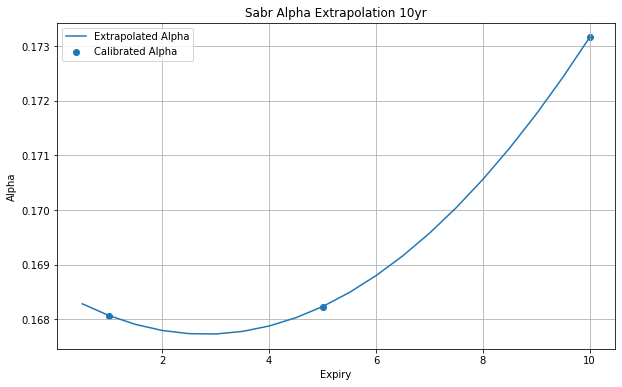

In [9]:
plt.figure(figsize = (10,6))
plt.scatter(data_sabr_dd_10yr_tenor.Expiry,data_sabr_dd_10yr_tenor.sabr_alpha, label = 'Calibrated Alpha', marker = 'o')
plt.plot(data_10yr.Expiry,data_10yr.sabr_alpha,  label = 'Extrapolated Alpha')
plt.xlabel('Expiry')
plt.ylabel('Alpha')
plt.title('Sabr Alpha Extrapolation 10yr')
plt.legend()
plt.grid()
plt.show()

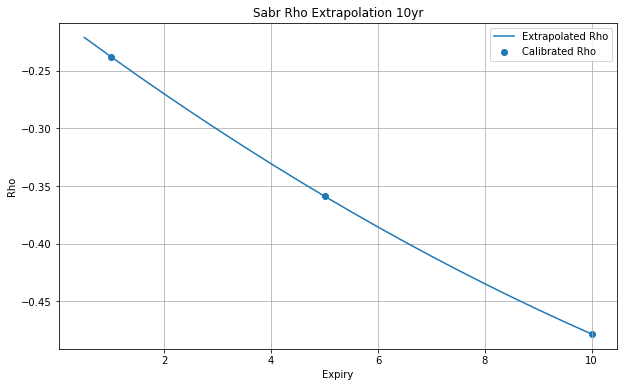

In [10]:
plt.figure(figsize = (10,6))
plt.scatter(data_sabr_dd_10yr_tenor.Expiry,data_sabr_dd_10yr_tenor.sabr_rho, label = 'Calibrated Rho', marker = 'o')
plt.plot(data_10yr.Expiry,data_10yr.sabr_rho,  label = 'Extrapolated Rho')
plt.xlabel('Expiry')
plt.ylabel('Rho')
plt.title('Sabr Rho Extrapolation 10yr')
plt.legend()
plt.grid()
plt.show()

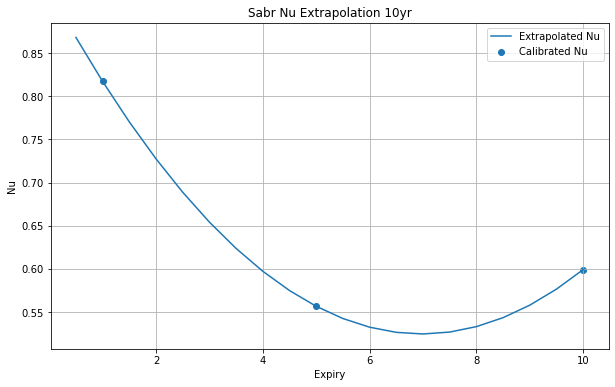

In [11]:
plt.figure(figsize = (10,6))
plt.scatter(data_sabr_dd_10yr_tenor.Expiry,data_sabr_dd_10yr_tenor.sabr_nu, label = 'Calibrated Nu', marker = 'o')
plt.plot(data_10yr.Expiry,data_10yr.sabr_nu,  label = 'Extrapolated Nu')
plt.xlabel('Expiry')
plt.ylabel('Nu')
plt.title('Sabr Nu Extrapolation 10yr')
plt.legend()
plt.grid()
plt.show()

# PV of a leg receiving CMS10y semi-annually over the next 5 years

In [12]:
##if no collateral

data_df['forward_swap_10yr'] = (data_df['lbs_Discount']-data_df['lbs_Discount'].shift(-20))/(0.5*data_df['lbs_Discount'].shift(-1).rolling(20).sum().shift(-19))
data_df['forward_tenor'] = 10
data_df['Expiry_forward'] = data_df['Tenor']
data_10yr['forward_swap_10yr_no_collateral'] = data_df['forward_swap_10yr']
data_10yr['libor_discount'] = data_df['lbs_Discount']
data_10yr = data_10yr.loc[data_10yr.Expiry<=5]
data_10yr

,Expiry,Tenor,-200bps,-150bps,-100bps,-50bps,-25bps,ATM,+25bps,+50bps,...,+150bps,+200bps,forward_swap,dd_beta,sabr_alpha,sabr_beta,sabr_rho,sabr_nu,forward_swap_10yr_no_collateral,libor_discount
0,0.5,10.0,NaN,NaN,NaN,NaN,NaN,24.455500,NaN,NaN,...,NaN,NaN,NaN,-0.013476,0.168284,0.9,-0.221128,0.868079,0.037477,0.987654
1,1.0,10.0,41.180,35.040,30.207,26.619,25.351,24.470000,23.98,23.82,...,25.204,26.355,0.038424,0.000022,0.168069,0.9,-0.237839,0.817103,0.038075,0.972577
2,1.5,10.0,NaN,NaN,NaN,NaN,NaN,24.482389,NaN,NaN,...,NaN,NaN,NaN,0.012129,0.167906,0.9,-0.254197,0.770218,0.038679,0.957378
3,2.0,10.0,NaN,NaN,NaN,NaN,NaN,24.492667,NaN,NaN,...,NaN,NaN,NaN,0.022846,0.167796,0.9,-0.270202,0.727425,0.039303,0.942179
4,2.5,10.0,NaN,NaN,NaN,NaN,NaN,24.500833,NaN,NaN,...,NaN,NaN,NaN,0.032173,0.167737,0.9,-0.285854,0.688723,0.039864,0.926330
5,3.0,10.0,NaN,NaN,NaN,NaN,NaN,24.506889,NaN,NaN,...,NaN,NaN,NaN,0.040108,0.167732,0.9,-0.301153,0.654113,0.040442,0.910482
6,3.5,10.0,NaN,NaN,NaN,NaN,NaN,24.510833,NaN,NaN,...,NaN,NaN,NaN,0.046654,0.167779,0.9,-0.316100,0.623595,0.041053,0.894731
7,4.0,10.0,NaN,NaN,NaN,NaN,NaN,24.512667,NaN,NaN,...,NaN,NaN,NaN,0.051808,0.167878,0.9,-0.330694,0.597167,0.041685,0.878981
8,4.5,10.0,NaN,NaN,NaN,NaN,NaN,24.512389,NaN,NaN,...,NaN,NaN,NaN,0.055572,0.168030,0.9,-0.344935,0.574832,0.042449,0.863985
9,5.0,10.0,34.417,30.948,28.148,25.954,25.136,24.510000,23.99,23.56,...,22.490,22.250,0.043612,0.057946,0.168234,0.9,-0.358823,0.556587,0.043243,0.848989


In [13]:
for i in range(0,len(data_10yr)):
    data_10yr.loc[data_10yr.index == i, 'CMS_10yr'] = getCMSRate(F=data_10yr['forward_swap_10yr_no_collateral'][i],
                                         N=data_10yr.Expiry[i]+data_10yr.Tenor[i],
                                         n=data_10yr.Expiry[i],
                                         T=data_10yr.Expiry[i],
                                         frequency=0.5,
                                         alpha=data_10yr.sabr_alpha[i], 
                                         beta=data_10yr.sabr_beta[i], 
                                         rho=data_10yr.sabr_rho[i], 
                                         nu=data_10yr.sabr_nu[i])
data_10yr['PV_CMS_10yr'] = 0.5 * data_10yr.CMS_10yr*data_10yr.libor_discount
data_10yr.to_csv(os.getcwd() + r'\10yr_5yr_cms.csv')
data_10yr

,Expiry,Tenor,-200bps,-150bps,-100bps,-50bps,-25bps,ATM,+25bps,+50bps,...,forward_swap,dd_beta,sabr_alpha,sabr_beta,sabr_rho,sabr_nu,forward_swap_10yr_no_collateral,libor_discount,CMS_10yr,PV_CMS_10yr
0,0.5,10.0,NaN,NaN,NaN,NaN,NaN,24.455500,NaN,NaN,...,NaN,-0.013476,0.168284,0.9,-0.221128,0.868079,0.037477,0.987654,0.037710,0.018622
1,1.0,10.0,41.180,35.040,30.207,26.619,25.351,24.470000,23.98,23.82,...,0.038424,0.000022,0.168069,0.9,-0.237839,0.817103,0.038075,0.972577,0.038670,0.018805
2,1.5,10.0,NaN,NaN,NaN,NaN,NaN,24.482389,NaN,NaN,...,NaN,0.012129,0.167906,0.9,-0.254197,0.770218,0.038679,0.957378,0.039933,0.019115
3,2.0,10.0,NaN,NaN,NaN,NaN,NaN,24.492667,NaN,NaN,...,NaN,0.022846,0.167796,0.9,-0.270202,0.727425,0.039303,0.942179,0.041634,0.019613
4,2.5,10.0,NaN,NaN,NaN,NaN,NaN,24.500833,NaN,NaN,...,NaN,0.032173,0.167737,0.9,-0.285854,0.688723,0.039864,0.926330,0.043592,0.020190
5,3.0,10.0,NaN,NaN,NaN,NaN,NaN,24.506889,NaN,NaN,...,NaN,0.040108,0.167732,0.9,-0.301153,0.654113,0.040442,0.910482,0.045739,0.020822
6,3.5,10.0,NaN,NaN,NaN,NaN,NaN,24.510833,NaN,NaN,...,NaN,0.046654,0.167779,0.9,-0.316100,0.623595,0.041053,0.894731,0.047980,0.021465
7,4.0,10.0,NaN,NaN,NaN,NaN,NaN,24.512667,NaN,NaN,...,NaN,0.051808,0.167878,0.9,-0.330694,0.597167,0.041685,0.878981,0.050263,0.022090
8,4.5,10.0,NaN,NaN,NaN,NaN,NaN,24.512389,NaN,NaN,...,NaN,0.055572,0.168030,0.9,-0.344935,0.574832,0.042449,0.863985,0.052745,0.022786
9,5.0,10.0,34.417,30.948,28.148,25.954,25.136,24.510000,23.99,23.56,...,0.043612,0.057946,0.168234,0.9,-0.358823,0.556587,0.043243,0.848989,0.055366,0.023503


In [14]:
print("PV of a leg receiving CMS10y semi-annually over the next 5 years is:" + str(round(data_10yr.PV_CMS_10yr.sum(),4)))

PV of a leg receiving CMS10y semi-annually over the next 5 years is:0.207


# Data Preparation for 2YrCMS

In [15]:
data_2yr = pd.DataFrame()
data_2yr['Expiry'] = np.arange(0.25,10.25,0.25)
data_2yr = data_2yr.set_index('Expiry')
data_sabr_dd =  pd.read_csv('sabr_dd.csv', index_col = 0)
data_sabr_dd_2yr_tenor = data_sabr_dd.loc[data_sabr_dd.Tenor == 2]
data_sabr_dd_2yr_tenor = data_sabr_dd_2yr_tenor.set_index('Expiry')
data_2yr[data_sabr_dd_2yr_tenor.columns] = data_sabr_dd_2yr_tenor
data_sabr_dd_2yr_tenor = data_sabr_dd_2yr_tenor.reset_index()
data_2yr = data_2yr.reset_index()
data_2yr_for_fit = data_2yr[["Tenor","ATM","dd_beta","sabr_alpha","sabr_beta","sabr_rho","sabr_nu"]]
for i in data_2yr_for_fit.columns.unique():
    data_2yr_for_fit[i] = data_2yr_for_fit[i].interpolate(method='polynomial',limit_direction = 'both',order=2)
    
## Initial parameter guess, just to kick off the optimization
guess = (0.5, 0.5, 0.5, 0.5)

# Function to curve fit to the data
def func(x, a, b, c, d):
    return a * (x ** 3) + b * (x ** 2) + c * x + d

# Create copy of data to remove NaNs for curve fitting
fit_df = data_2yr_for_fit.dropna()

# Place to store function parameters for each column
col_params = {}

# Curve fit each column
for col in fit_df.columns:
    # Get x & y
    x = fit_df.index.astype(float).values
    y = fit_df[col].values
    # Curve fit column and get curve parameters
    params = curve_fit(func, x, y, guess)
    # Store optimized parameters
    col_params[col] = params[0]

# Extrapolate each column
for col in data_2yr_for_fit.columns:
    # Get the index values for NaNs in the column
    x = data_2yr_for_fit[pd.isnull(data_2yr_for_fit[col])].index.astype(float).values
    # Extrapolate those points with the fitted function
    data_2yr_for_fit[col][x] = func(x, *col_params[col])

data_2yr[data_2yr_for_fit.columns] = data_2yr_for_fit
data_2yr.tail()

,Expiry,Tenor,-200bps,-150bps,-100bps,-50bps,-25bps,ATM,+25bps,+50bps,+100bps,+150bps,+200bps,forward_swap,dd_beta,sabr_alpha,sabr_beta,sabr_rho,sabr_nu
35,9.00,2.0,NaN,NaN,NaN,NaN,NaN,29.562222,NaN,NaN,NaN,NaN,NaN,NaN,0.000002,0.198982,0.9,-0.549875,0.898402
36,9.25,2.0,NaN,NaN,NaN,NaN,NaN,29.499740,NaN,NaN,NaN,NaN,NaN,NaN,0.000002,0.198451,0.9,-0.549464,0.903145
37,9.50,2.0,NaN,NaN,NaN,NaN,NaN,29.431875,NaN,NaN,NaN,NaN,NaN,NaN,0.000002,0.197861,0.9,-0.548982,0.909645
38,9.75,2.0,NaN,NaN,NaN,NaN,NaN,29.358628,NaN,NaN,NaN,NaN,NaN,NaN,0.000002,0.197212,0.9,-0.548427,0.917904
39,10.00,2.0,51.17,42.9,37.078,32.622,30.8,29.280000,28.09,27.2,26.12,25.72,25.71,0.043057,0.000003,0.196505,0.9,-0.547800,0.927920


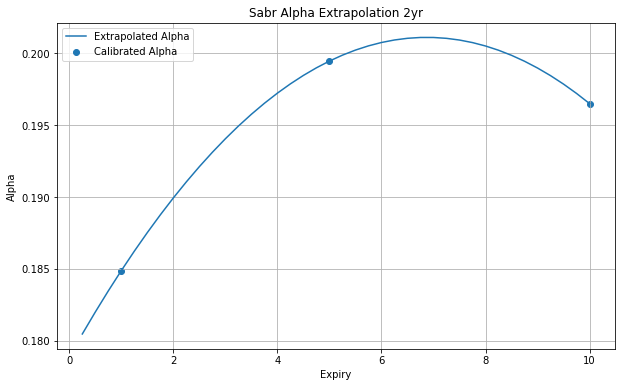

In [16]:
plt.figure(figsize = (10,6))
plt.scatter(data_sabr_dd_2yr_tenor.Expiry,data_sabr_dd_2yr_tenor.sabr_alpha, label = 'Calibrated Alpha', marker = 'o')
plt.plot(data_2yr.Expiry,data_2yr.sabr_alpha,  label = 'Extrapolated Alpha')
plt.xlabel('Expiry')
plt.ylabel('Alpha')
plt.title('Sabr Alpha Extrapolation 2yr')
plt.legend()
plt.grid()
plt.show()


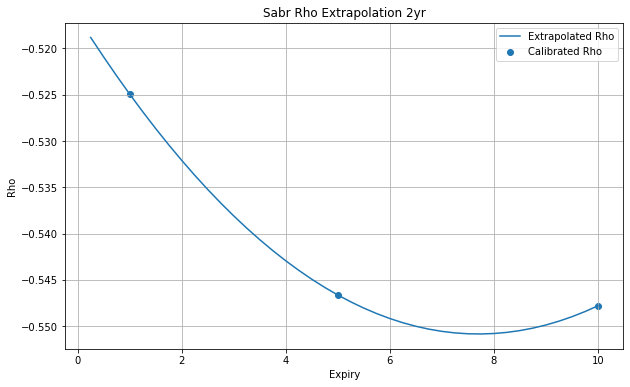

In [17]:
plt.figure(figsize = (10,6))
plt.scatter(data_sabr_dd_2yr_tenor.Expiry,data_sabr_dd_2yr_tenor.sabr_rho, label = 'Calibrated Rho', marker = 'o')
plt.plot(data_2yr.Expiry,data_2yr.sabr_rho,  label = 'Extrapolated Rho')
plt.xlabel('Expiry')
plt.ylabel('Rho')
plt.title('Sabr Rho Extrapolation 2yr')
plt.legend()
plt.grid()
plt.show()


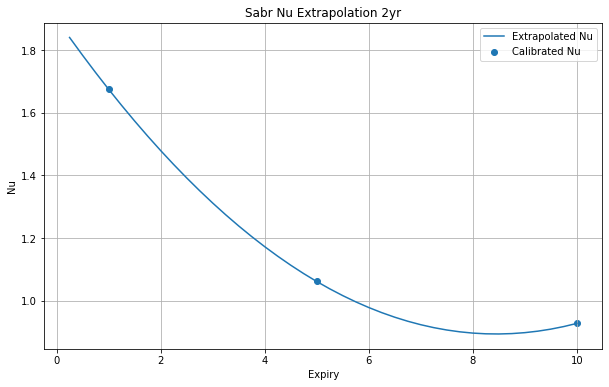

In [18]:
plt.figure(figsize = (10,6))
plt.scatter(data_sabr_dd_2yr_tenor.Expiry,data_sabr_dd_2yr_tenor.sabr_nu, label = 'Calibrated Nu', marker = 'o')
plt.plot(data_2yr.Expiry,data_2yr.sabr_nu,  label = 'Extrapolated Nu')
plt.xlabel('Expiry')
plt.ylabel('Nu')
plt.title('Sabr Nu Extrapolation 2yr')
plt.legend()
plt.grid()
plt.show()


# PV of a leg receiving CMS2y quarterly over the next 10 years

In [19]:
data_df_quarter =  pd.read_csv('data_quarterly.csv', index_col = 0)
data_df_quarter.tail()

,Tenor,Rate,float,OIS_Discount,lbs_rate,lbs_Discount,forward_libor
115,29.00,NaN,0.003582,0.904679,NaN,0.243678,0.075459
116,29.25,NaN,0.003582,0.903870,NaN,0.239082,0.076910
117,29.50,NaN,0.003582,0.903060,NaN,0.234485,0.078418
118,29.75,NaN,0.003582,0.902252,NaN,0.229888,0.079986
119,30.00,0.0055,0.003582,0.901444,0.05,0.225291,0.081618


In [20]:
##if no collateral

data_df_quarter['forward_swap_2yr'] = (data_df_quarter['lbs_Discount']-data_df_quarter['lbs_Discount'].shift(-8))/(0.25*data_df_quarter['lbs_Discount'].shift(-1).rolling(8).sum().shift(-7))
data_df_quarter['forward_tenor'] = 2
data_df_quarter['Expiry_forward'] = data_df_quarter['Tenor']
data_2yr['forward_swap_2yr_no_collateral'] = data_df_quarter['forward_swap_2yr']
data_2yr['libor_discount'] = data_df_quarter['lbs_Discount']
data_2yr = data_2yr.loc[data_2yr.Expiry<=10]
data_2yr.tail()


,Expiry,Tenor,-200bps,-150bps,-100bps,-50bps,-25bps,ATM,+25bps,+50bps,...,+150bps,+200bps,forward_swap,dd_beta,sabr_alpha,sabr_beta,sabr_rho,sabr_nu,forward_swap_2yr_no_collateral,libor_discount
35,9.00,2.0,NaN,NaN,NaN,NaN,NaN,29.562222,NaN,NaN,...,NaN,NaN,NaN,0.000002,0.198982,0.9,-0.549875,0.898402,0.042619,0.723232
36,9.25,2.0,NaN,NaN,NaN,NaN,NaN,29.499740,NaN,NaN,...,NaN,NaN,NaN,0.000002,0.198451,0.9,-0.549464,0.903145,0.042671,0.715609
37,9.50,2.0,NaN,NaN,NaN,NaN,NaN,29.431875,NaN,NaN,...,NaN,NaN,NaN,0.000002,0.197861,0.9,-0.548982,0.909645,0.042719,0.707986
38,9.75,2.0,NaN,NaN,NaN,NaN,NaN,29.358628,NaN,NaN,...,NaN,NaN,NaN,0.000002,0.197212,0.9,-0.548427,0.917904,0.042763,0.700363
39,10.00,2.0,51.17,42.9,37.078,32.622,30.8,29.280000,28.09,27.2,...,25.72,25.71,0.043057,0.000003,0.196505,0.9,-0.547800,0.927920,0.042804,0.692740


In [21]:
for i in range(0,len(data_2yr)):
    data_2yr.loc[data_2yr.index == i, 'CMS_2yr'] = getCMSRate(F=data_2yr['forward_swap_2yr_no_collateral'][i],
                                         N=data_2yr.Expiry[i]+data_2yr.Tenor[i],
                                         n=data_2yr.Expiry[i],
                                         T=data_2yr.Expiry[i],
                                         frequency=0.25,
                                         alpha=data_2yr.sabr_alpha[i], 
                                         beta=data_2yr.sabr_beta[i], 
                                         rho=data_2yr.sabr_rho[i], 
                                         nu=data_2yr.sabr_nu[i])
data_2yr['PV_CMS_2yr'] = 0.25 * data_2yr.CMS_2yr*data_2yr.libor_discount
data_2yr.to_csv(os.getcwd() + r'\2yr_10yr_cms_quarterly.csv')


In [22]:
print("PV of a leg receiving CMS2y quarterly over the next 10 years is:" + str(round(data_2yr.PV_CMS_2yr.sum(),4)))

PV of a leg receiving CMS2y quarterly over the next 10 years is:0.452


## Compare

In [23]:
def get_forward_and_cms(exp_num,tenor_number):
    data_2yr = pd.DataFrame()
    data_2yr['Expiry'] = np.arange(0.25,10.25,0.25)
    data_2yr = data_2yr.set_index('Expiry')
    data_sabr_dd =  pd.read_csv('sabr_dd.csv', index_col = 0)
    data_sabr_dd_2yr_tenor = data_sabr_dd.loc[data_sabr_dd.Tenor == tenor_number]
    data_sabr_dd_2yr_tenor = data_sabr_dd_2yr_tenor.set_index('Expiry')
    data_2yr[data_sabr_dd_2yr_tenor.columns] = data_sabr_dd_2yr_tenor
    data_sabr_dd_2yr_tenor = data_sabr_dd_2yr_tenor.reset_index()
    data_2yr = data_2yr.reset_index()
    data_2yr_for_fit = data_2yr[["Tenor","ATM","dd_beta","sabr_alpha","sabr_beta","sabr_rho","sabr_nu"]]
    for i in data_2yr_for_fit.columns.unique():
        data_2yr_for_fit[i] = data_2yr_for_fit[i].interpolate(method='polynomial',limit_direction = 'both',order=2)

    ## Initial parameter guess, just to kick off the optimization
    guess = (0.5, 0.5, 0.5, 0.5)

    # Function to curve fit to the data
    def func(x, a, b, c, d):
        return a * (x ** 3) + b * (x ** 2) + c * x + d

    # Create copy of data to remove NaNs for curve fitting
    fit_df = data_2yr_for_fit.dropna()

    # Place to store function parameters for each column
    col_params = {}

    # Curve fit each column
    for col in fit_df.columns:
        # Get x & y
        x = fit_df.index.astype(float).values
        y = fit_df[col].values
        # Curve fit column and get curve parameters
        params = curve_fit(func, x, y, guess)
        # Store optimized parameters
        col_params[col] = params[0]

    # Extrapolate each column
    for col in data_2yr_for_fit.columns:
        # Get the index values for NaNs in the column
        x = data_2yr_for_fit[pd.isnull(data_2yr_for_fit[col])].index.astype(float).values
        # Extrapolate those points with the fitted function
        data_2yr_for_fit[col][x] = func(x, *col_params[col])

    data_2yr[data_2yr_for_fit.columns] = data_2yr_for_fit


    ##if no collateral

    data_df_quarter['forward_swap_2yr'] = (data_df_quarter['lbs_Discount']-data_df_quarter['lbs_Discount'].shift(-int(tenor_number/0.25)))/(0.25*data_df_quarter['lbs_Discount'].shift(-1).rolling(int(tenor_number/0.25)).sum().shift(-int(tenor_number/0.25)+1))
    data_df_quarter['forward_tenor'] = 2
    data_df_quarter['Expiry_forward'] = data_df_quarter['Tenor']
    data_2yr['forward_swap_no_collateral'] = data_df_quarter['forward_swap_2yr']
    data_2yr['libor_discount'] = data_df_quarter['lbs_Discount']
    data_2yr = data_2yr.loc[data_2yr.Expiry<=10]



    for i in range(0,len(data_2yr)):
        data_2yr.loc[data_2yr.index == i, 'CMS_rate'] = getCMSRate(F=data_2yr['forward_swap_no_collateral'][i],
                                             N=data_2yr.Expiry[i]+data_2yr.Tenor[i],
                                             n=data_2yr.Expiry[i],
                                             T=data_2yr.Expiry[i],
                                             frequency=0.25,
                                             alpha=data_2yr.sabr_alpha[i], 
                                             beta=data_2yr.sabr_beta[i], 
                                             rho=data_2yr.sabr_rho[i], 
                                             nu=data_2yr.sabr_nu[i])
    data_2yr['PV_CMS_2yr'] = 0.25 * data_2yr.CMS_rate*data_2yr.libor_discount

    return [exp_num,tenor_number,data_2yr.loc[(data_2yr.Tenor==tenor_number)&(data_2yr.Expiry==exp_num),'forward_swap_no_collateral'].values[0],data_2yr.loc[(data_2yr.Tenor==tenor_number)&(data_2yr.Expiry==exp_num),'CMS_rate'].values[0]]

In [24]:
expiry_list = [1,5,10]
tenor_list = [1,2,3,5,10] 
compare_df = pd.DataFrame(columns = ['Expiry','Tenor','forward_swap_no_collateral','CMS_rate'])

for i in expiry_list:
    for j in tenor_list:
        compare_df = compare_df.append(pd.DataFrame([get_forward_and_cms(i,j)], columns=['Expiry','Tenor','forward_swap_no_collateral','CMS_rate']),ignore_index=True)
compare_df['Convexity_Correction'] = compare_df.CMS_rate     - compare_df.forward_swap_no_collateral

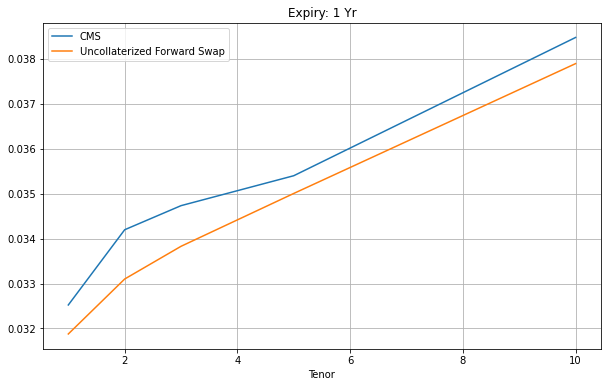

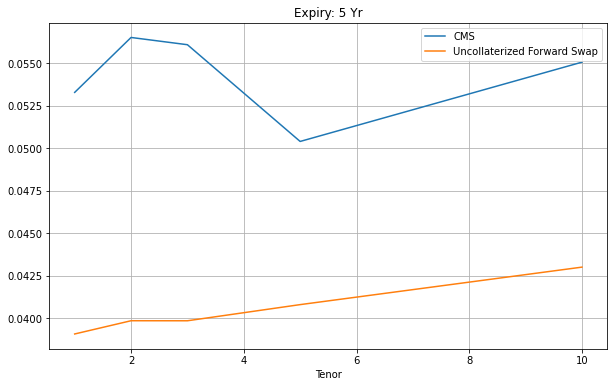

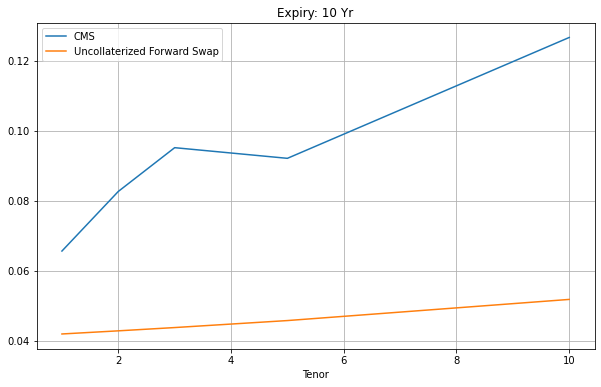

In [25]:
for i in compare_df.Expiry.unique():
    compare_df_plot = compare_df.loc[compare_df.Expiry == i]
    plt.figure(figsize = (10,6))
    plt.plot(compare_df_plot.Tenor,compare_df_plot.CMS_rate, label = 'CMS')
    plt.plot(compare_df_plot.Tenor,compare_df_plot.forward_swap_no_collateral,  label = 'Uncollaterized Forward Swap')
    plt.xlabel('Tenor')
    plt.title('Expiry: '+ str(i) + ' Yr')
    plt.legend()
    plt.grid()
    plt.show()


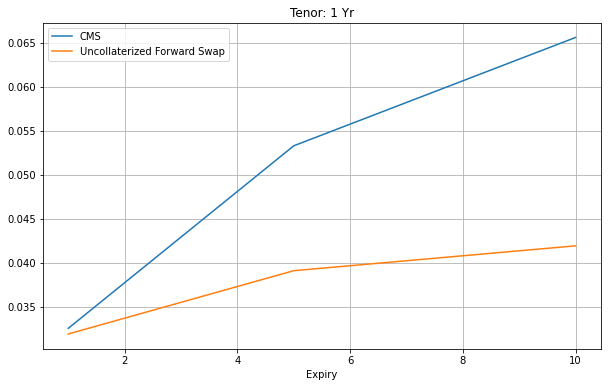

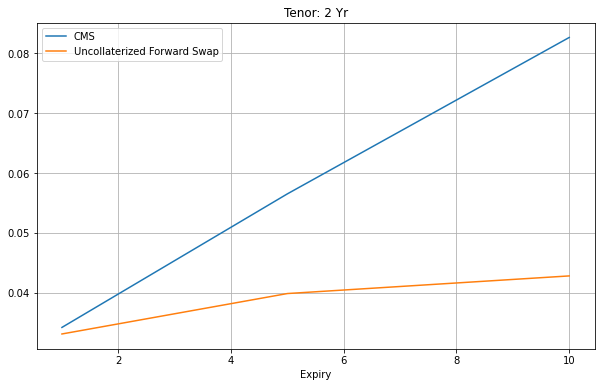

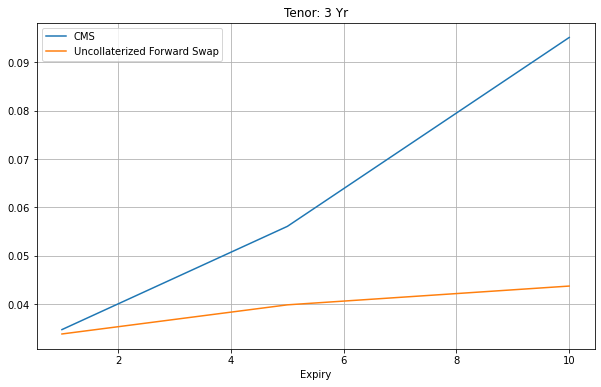

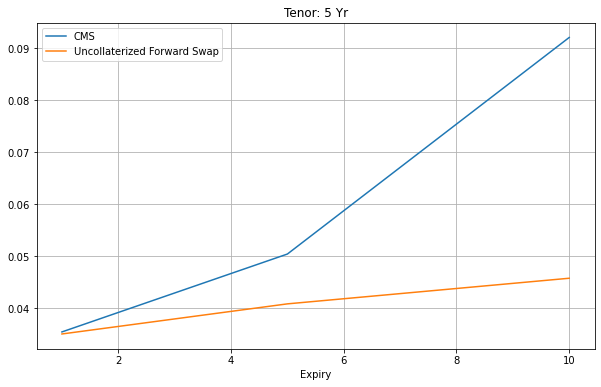

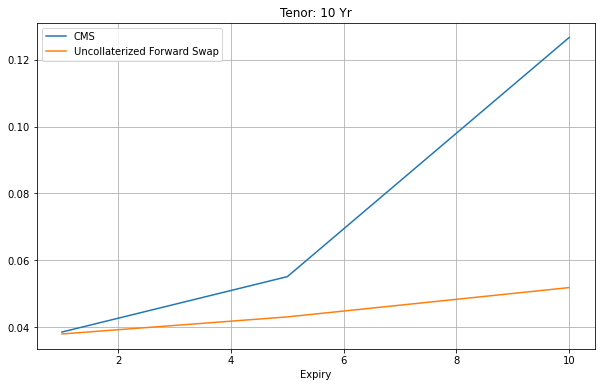

In [26]:
for i in compare_df.Tenor.unique():
    compare_df_plot = compare_df.loc[compare_df.Tenor == i]
    plt.figure(figsize = (10,6))
    plt.plot(compare_df_plot.Expiry,compare_df_plot.CMS_rate, label = 'CMS')
    plt.plot(compare_df_plot.Expiry,compare_df_plot.forward_swap_no_collateral,  label = 'Uncollaterized Forward Swap')
    plt.xlabel('Expiry')
    plt.title('Tenor: '+ str(i) + ' Yr')
    plt.legend()
    plt.grid()
    plt.show()


In [27]:
compare_df

,Expiry,Tenor,forward_swap_no_collateral,CMS_rate,Convexity_Correction
0,1,1,0.031878,0.032523,0.000646
1,1,2,0.033101,0.034197,0.001097
2,1,3,0.033829,0.034734,0.000905
3,1,5,0.035005,0.035400,0.000395
4,1,10,0.037895,0.038477,0.000582
5,5,1,0.039079,0.053289,0.014210
6,5,2,0.039858,0.056520,0.016662
7,5,3,0.039855,0.056093,0.016238
8,5,5,0.040806,0.050404,0.009598
9,5,10,0.043011,0.055067,0.012056
